## County Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data from CSV File to Pandas DataFrame

In [3]:
df_atms = pd.read_csv('LADdata/atms.csv')
df_libraries = pd.read_csv('LADdata/libraries.csv')
df_facilities = pd.read_csv('LADdata/communityfacilities.csv')
df_parksandplayareas = pd.read_csv('LADdata/parksandplayareas.csv')
df_postoffices = pd.read_csv('LADdata/postoffices.csv')
df_railstations = pd.read_csv('LADdata/railstations.csv')
df_traveltime = pd.read_csv('LADdata/traveltimetorailstations.csv')

## Data Cleaning

In [4]:
df_atms = df_atms[['LAD code', 'LAD name','Total ATM Count per 100,000 people']]

df_libraries = df_libraries[['LAD code', 'LAD name','Libraries per 100,000 people']]

df_facilities = df_facilities[['LAD code', 'LAD name','Community Facilities per 100,000 people']]

df_parksandplayareas = df_parksandplayareas[['LAD code', 'LAD name', 'Parks and Play areas per 100,000 people']]

df_postoffices = df_postoffices[['LAD code', 'LAD name', 'Post Offices per 100,000 people']]

df_railstations = df_railstations[['LAD code', 'LAD name', 'Rail Stations per 100,000 people']]

df_traveltime = df_traveltime[['LAD code', 'LAD name', 'Less than 15 minute walk']]
df_traveltime.rename(columns = {'Less than 15 minute walk' : 'Approachable stations by walk'}, inplace = True)

## Merge Data

In [5]:
df = pd.merge(df_atms, df_facilities, on = ['LAD code', 'LAD name'])
df = pd.merge(df, df_libraries, on = ['LAD code', 'LAD name'])
df = pd.merge(df, df_parksandplayareas, on = ['LAD code', 'LAD name'])
df = pd.merge(df, df_postoffices, on = ['LAD code', 'LAD name'])
df = pd.merge(df, df_railstations, on = ['LAD code', 'LAD name'])
df = pd.merge(df, df_traveltime, on = ['LAD code', 'LAD name'])
df.replace('[c]', 0, inplace = True)

## Merge the data Predicted House Price in Mar 2025

In [27]:
pred_2025 = {'Hartlepool': 137734.84, 'Middlesbrough': 145011.95, 'Redcar and Cleveland': 157849.81, 'Stockton-on-Tees': 161017.08, 'Darlington': 157486.5, 'County Durham': 124991.414, 'Northumberland': 195171.94, 'Tyne and Wear': 165027.31, 'Halton': 164971.61, 'Warrington': 241973.39, 'Blackburn with Darwen': 138229.33, 'Blackpool': 132988.72, 'Cheshire East': 274947.12, 'Cheshire West and Chester': 242733.38, 'Cumberland': 154968.52, 'Westmorland and Furness': 229926.48, 'Lancashire': 180976.55, 'Greater Manchester': 219970.11, 'Merseyside': 184978.66, 'Kingston upon Hull, City of': 129001.2, 'East Riding of Yorkshire': 219938.72, 'North East Lincolnshire': 154990.16, 'North Lincolnshire': 167983.33, 'York': 308876.44, 'North Yorkshire': 262489.2, 'South Yorkshire': 175731.78, 'West Yorkshire': 194987.92, 'Derby': 199952.88, 'Leicester': 231962.47, 'Rutland': 360055.28, 'Nottingham': 186413.77, 'North Northamptonshire': 249958.14, 'West Northamptonshire': 289975.3, 'Derbyshire': 219985.03, 'Leicestershire': 269978.56, 'Lincolnshire': 223992.97, 'Nottinghamshire': 224982.62, 'Herefordshire, County of': 279985.9, 'Telford and Wrekin': 214961.19, 'Stoke-on-Trent': 140577.69, 'Shropshire': 264983.66, 'Staffordshire': 235061.2, 'Warwickshire': 295982.25, 'Worcestershire': 280079.6, 'West Midlands': 219982.98, 'Peterborough': 235977.44, 'Luton': 299970.4, 'Southend-on-Sea': 334537.88, 'Thurrock': 344940.78, 'Bedford': 324966.72, 'Central Bedfordshire': 355048.2, 'Cambridgeshire': 350089.38, 'Essex': 359960.66, 'Hertfordshire': 449953.25, 'Norfolk': 269964.34, 'Suffolk': 284960.72, 'Inner London': 609655.94, 'Outer London': 489622.38, 'Medway': 299947.66, 'Bracknell Forest': 384884.53, 'West Berkshire': 390054.03, 'Reading': 340979.38, 'Slough': 384209.2, 'Windsor and Maidenhead': 524394.44, 'Wokingham': 484978.88, 'Milton Keynes': 341208.56, 'Brighton and Hove': 425069.25, 'Portsmouth': 254191.7, 'Southampton': 244983.61, 'Isle of Wight': 264982.12, 'Buckinghamshire': 454397.47, 'East Sussex': 336456.6, 'Hampshire': 359981.44, 'Kent': 347439.94, 'Oxfordshire': 399975.66, 'Surrey': 504669.84, 'West Sussex': 385003.28, 'Bath and North East Somerset': 389975.22, 'Bristol, City of': 339997.72, 'North Somerset': 319009.4, 'South Gloucestershire': 324994.84, 'Plymouth': 209970.36, 'Torbay': 249976.95, 'Swindon': 262455.1, 'Cornwall': 284949.84, 'Isles of Scilly': 350479.25, 'Wiltshire': 315040.38, 'Bournemouth, Christchurch and Poole': 335022.28, 'Dorset': 344971.0, 'Somerset': 277454.88, 'Devon': 312449.8, 'Gloucestershire': 310114.34, 'Isle of Anglesey': 224963.9, 'Gwynedd': 185028.22, 'Conwy': 209983.53, 'Denbighshire': 179952.98, 'Flintshire': 191209.7, 'Wrexham': 178005.55, 'Ceredigion': 229940.7, 'Pembrokeshire': 219924.83, 'Carmarthenshire': 179973.62, 'Swansea': 179948.86, 'Neath Port Talbot': 154726.08, 'Bridgend': 194979.42, 'Vale of Glamorgan': 274957.34, 'Cardiff': 252679.9, 'Rhondda Cynon Taf': 144998.72, 'Caerphilly': 174946.61, 'Blaenau Gwent': 127988.23, 'Torfaen': 179946.28, 'Monmouthshire': 312460.84, 'Newport': 218254.36, 'Powys': 229919.1, 'Merthyr Tydfil': 136797.94}
df_pred_2025 = pd.DataFrame(list(pred_2025.items()), columns=['County_name', 'Predicted Price'])

In [28]:
df_price = pd.read_csv('pred_2025.csv')
df_price
df_price.rename(columns = {'County': 'LAD name'}, inplace = True)
new_df = pd.merge(df, df_price, on = ['LAD name'])
new_df

,LAD code,LAD name,"Total ATM Count per 100,000 people","Community Facilities per 100,000 people","Libraries per 100,000 people","Parks and Play areas per 100,000 people","Post Offices per 100,000 people","Rail Stations per 100,000 people",Approachable stations by walk,House Price
0,E06000001,Hartlepool,111.15,61.87,7.34,51.38,9.44,0.00,13,137734.84
1,E06000002,Middlesbrough,93.02,55.68,5.90,39.31,8.52,0.00,15,145011.95
2,E06000003,Redcar and Cleveland,66.70,82.65,9.42,89.90,13.77,5.80,23,157849.81
3,E06000004,Stockton-on-Tees,75.59,48.91,4.45,40.02,9.88,2.96,17,161017.08
4,E06000005,Darlington,86.83,64.22,0,52.46,14.47,0.00,27,157486.50
...,...,...,...,...,...,...,...,...,...,...
80,W06000020,Torfaen,79.21,119.89,0,117.75,12.85,0.00,10,179946.28
81,W06000021,Monmouthshire,58.16,140.63,6.34,201.96,19.03,0.00,12,312460.84
82,W06000022,Newport,89.23,78.23,5.50,80.67,15.89,0.00,17,218254.36
83,W06000023,Powys,52.81,186.70,13.39,168.85,33.47,11.90,11,229919.10


## Correlation

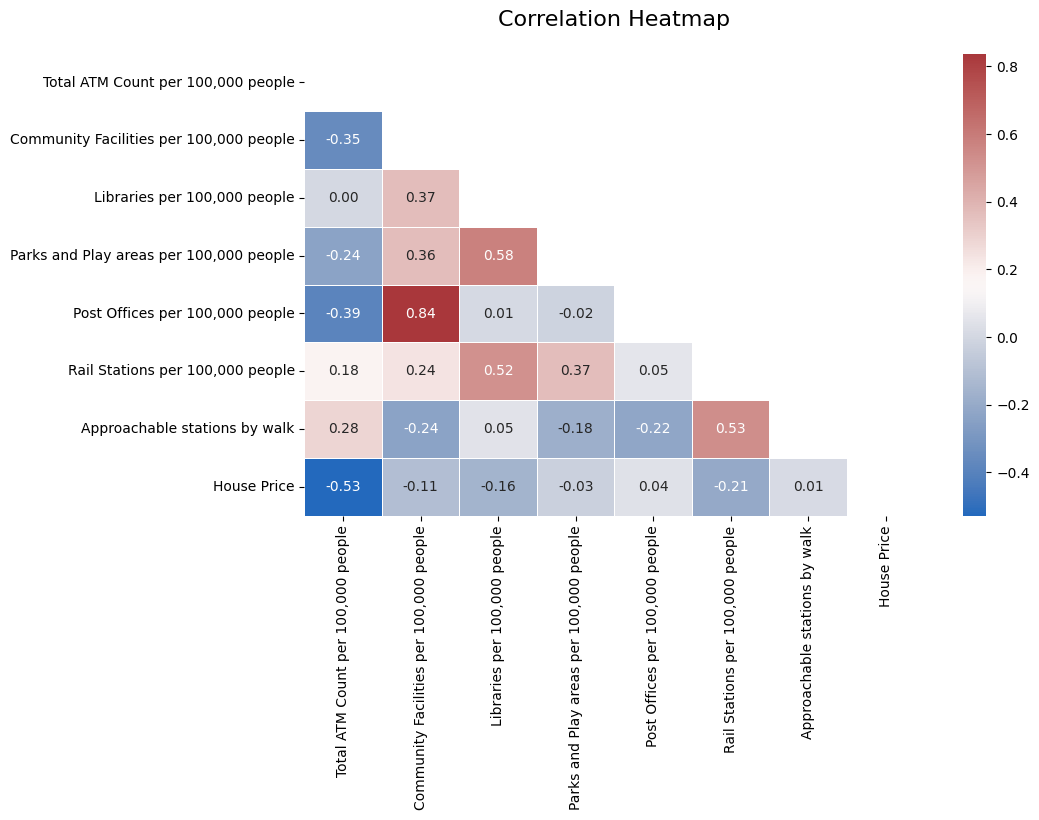

In [29]:
new_df_without_code = new_df.drop(['LAD code', 'LAD name'], axis = 1)
corr = new_df_without_code.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (10,6))
sns.heatmap(corr, mask=mask, annot=True, cmap = 'vlag', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.show()

## Clustering using K-means

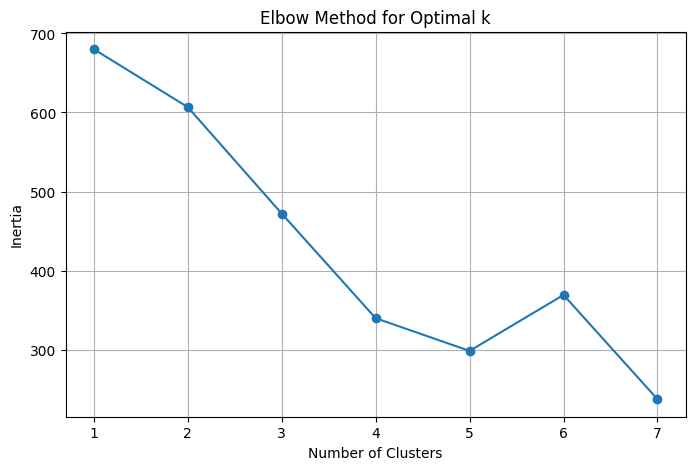

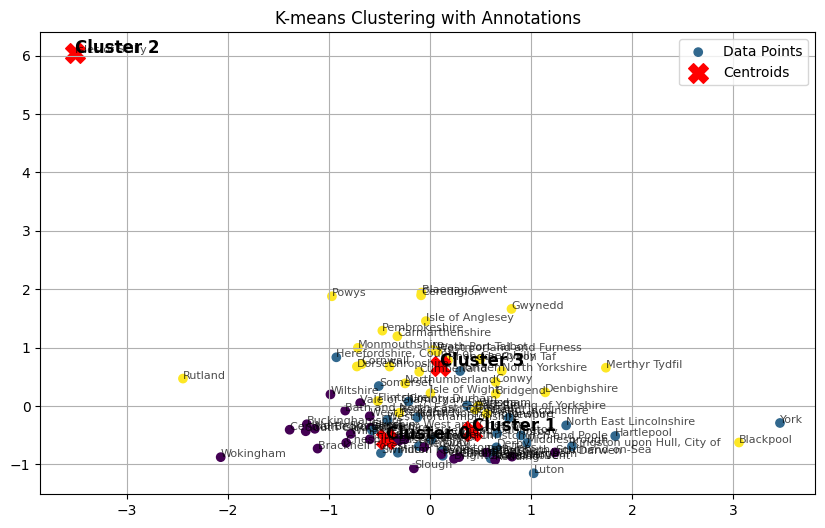

In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data (assuming new_df is your DataFrame with the required columns)
X = new_df[['Total ATM Count per 100,000 people',
             'Community Facilities per 100,000 people',
             'Libraries per 100,000 people',
             'Parks and Play areas per 100,000 people',
             'Post Offices per 100,000 people',
             'Rail Stations per 100,000 people',
             'Approachable stations by walk',
             'House Price']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 8)  
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Choose the number of clusters (e.g., k = 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', label='Data Points')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Annotate the points with country names
for i, txt in enumerate(new_df['LAD name']):
    plt.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), fontsize=8, alpha=0.7)

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i}', fontsize=12, color='black', weight='bold')

plt.title('K-means Clustering with Annotations')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster 0: [-0.43215602 -0.56500527 -0.31603717 -0.42709621 -0.32718644 -0.06439783
  0.6210842   0.9459704 ]
Cluster 1: [ 0.42087648 -0.43328748 -0.64397644 -0.3845575  -0.24520615 -0.70427928
 -0.65621153 -0.41951596]
Cluster 2: [-3.50691769  6.03922658 -2.05245079 -2.29396265  8.67844702 -0.86446135
 -1.85391747  1.11649147]
Cluster 3: [ 0.09861442  0.69276533  0.94335859  0.80553581  0.22313909  0.74195417
  0.13598838 -0.46550916]


## Livable counties in Mar 2025

In [71]:
new_df['Cluster'] = labels

# Filter the DataFrame for countries in cluster 3
cluster_3_countries = new_df[new_df['Cluster'] == 3]['LAD name']

# Print the countries in cluster 3
print("Countries in Cluster 3:")
for country in cluster_3_countries:
    print(country)

Countries in Cluster 3:
Redcar and Cleveland
Blackpool
East Riding of Yorkshire
North Lincolnshire
Rutland
Isle of Wight
Shropshire
Cornwall
Northumberland
Dorset
Cumberland
Westmorland and Furness
North Yorkshire
Isle of Anglesey
Gwynedd
Conwy
Denbighshire
Flintshire
Wrexham
Ceredigion
Pembrokeshire
Carmarthenshire
Neath Port Talbot
Bridgend
Rhondda Cynon Taf
Caerphilly
Blaenau Gwent
Monmouthshire
Powys
Merthyr Tydfil
